# Problem Set 5. Quantative Macroeconomics
### Adam Wilczynski, Alena Sokolyanskaya

#### A simple wealth model
Logarithmic utility is a special case of CRRA utility when sigma -> 1
$$ \lim_{\sigma \to 1} \frac{c^{1-\sigma}-1}{1-\sigma} = \lim_{\sigma \to 1} \frac{e^{\log{c^{1-\sigma}}}-1}{1-\sigma} = \lim_{\sigma \to 1} \frac{e^{(1-\sigma)\log{c}}-1}{1-\sigma} $$
Applying d'Hopital rule:
$$ \lim_{\sigma \to 1} \frac{e^{(1-\sigma)\log{c}}-1}{1-\sigma} = \lim_{\sigma \to 1} \frac{e^{(1-\sigma)\log{c}}(-\log{c})}{-1} = \log{c}$$


if r = 4% < ρ = 6% then agents would like to increase the consumption now and decrease in the future

Recursive form: $ V(t,T) = \max_{a_{t+1}} u( y_t + (1+r)a_t - a_{t+1}) + \beta \sum_{l'=1}^q \pi_{l,l'} V(t+1, T) $

#### [1st case]: Borrowing not allowed
$ L = \sum_{t=0}^{T} \sum_{s^t} [ \beta^t \pi_t(s^t) U(c(s^t), s^t) + \lambda ( s^t) (y_t(s^t)+ a_t(s^{t-1})- c_t(s^t)- a_{t+1}(s^t)) + \mu(s^t)(a_{t+1}(s^t)-)]    $

Then, taking first order conditions with respect to $a_{t+1}(s_t) $ we find:

$ -\beta^t \pi_t(s^t)U'_c(c_t(s^t), s^t) + (1+r) \beta^{t+1} \sum_{s^{t+1}} \pi_{t+1}(s^{t+1})U'_c(c_{t+1}, s^{t+1}) = 0$

with complementary slackness conditions: 

either: $ \mu(s^t) = 0 $ or $ a_{t+1}(s^t) = 0 $

Therefore, 
$
U'_c(c_t)  \left\{ \begin{array}{ll}
\geq \frac{1+r}{1+\rho} E_t U'_c(c_{t+1}) & \textrm{if $a_{t+1}(s^t) = 0$}\\
= \frac{1+r}{1+\rho} E_t U'_c(c_{t+1}) & \textrm{if $a_{t+1}(s^t) \geq 0 $}
\end{array} \right.
$
##### Euler equation: $ u'_c(c^t) = \max \{ u(y_t+a_t), \frac{1+r}{1+\rho} E_t u(c_{t+1}) \}$

#### [2nd case]: Borrowing allowed

$ L = \sum_{t=0}^{T} \sum_{s^t} [ \beta^t \pi_t(s^t) U(y_t(s^t)+ (1+r)a_t(s^{t-1})- a_{t+1}(s^t), s^t) + \mu(s^t)(a_{t+1}(s^t)-y_{min} \frac{r+1}{r})]    $

Then, taking first order conditions with respect to $a_{t+1}(s_t) $ we find:

$ -\beta^t \pi_t(s^t)U'_c(c_t(s^t), s^t) + (1+r) \beta^{t+1} \sum_{s^{t+1}} \pi_{t+1}(s^{t+1})U'_c(c_{t+1}, s^{t+1}) - \mu_t(s^t) = 0$

with complementary slackness conditions: 

either: $ \mu(s^t) = 0 $ or $ a_{t+1}(s^t) = y_{min} \frac {r+1}{r} $

Therefore, 
$
U'_c(c_t)  \left\{ \begin{array}{ll}
\geq \frac{1+r}{1+\rho} E_t U'_c(c_{t+1}) & \textrm{if $a_{t+1}(s^t) = y_{min} \frac {r+1}{r}$}\\
= \frac{1+r}{1+\rho} E_t U'_c(c_{t+1}) & \textrm{if $a_{t+1}(s^t) \geq y_{min} \frac {r+1}{r} $}
\end{array} \right.
$

##### Euler equation: $ u'_c(c^t) = \max \{ u(y_t+a_t+y_{min} \frac{r+1}{r}), \frac{1+r}{1+\rho} E_t u(c_{t+1}) \}$ in case of infinite horizont
##### Euler equation: $ u'_c(c^t) = \max \{ u(y_t+a_t+y_{min} \frac{r+1-(r+1)^{t-T+1}}{r}), \frac{1+r}{1+\rho} E_t u(c_{t+1}) \}$ in case of finite horizont

## [I] PARTIAL EQUILIBRIUM
### INFINITE CASE
To solve partial equilibrium model for infinite time, we used the value function iteration method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use("ggplot")

class HW5_VFI:
    
    def __init__(self, rho, r, sigma, c_bar, gamma, sigma_y, y):
        self.rho = rho
        self.r = r
        self.sigma = sigma
        self.c_bar = c_bar
        self.gamma = gamma
        self.sigma_y = sigma_y
        self.beta = 1/(1+rho)
        self.Y1 = [y-sigma_y, y+sigma_y]
        self.PI1 = [[(1+gamma)/2, (1-gamma)/2], [(1-gamma)/2, (1+gamma)/2]]
        self.A_min = round(-min(self.Y1)*((1+r)/r)/1.3) #divide by 1.3 temporarily
        #self.A = np.linspace(self.A_min, 100, 100)       
        self.p = abs(self.A_min)+20+1
        self.A = np.linspace(self.A_min, 20, self.p)
            
    def u(self, c):
        if c<0:
            return(-1111111111)
        else:
            if self.sigma > 0:
                return ((c**(1-self.sigma)-1)/(1-self.sigma)) #CRRA
            else:
                return (-0.5*(c-self.c_bar)**2) #quad

    def d_u(self, c):
        if c<0:
            return(-33333333)
        else:   
            if self.sigma > 0:
                return (c**(-self.sigma))
            else:
                return (-(c-self.c_bar))
    
    def m(self, ai,aj, y):
        if aj<self.A_min:
            return -9999999999999999999
        else:
            c = y-aj+ai*(1+self.r)
            #Step 4 (consumption must be non negative)
            if c >= 0:
                return self.u(c)
            else:
                return (-10000000000000000000)

    def matrix_M(self):
        M = [0]*(self.p*len(self.Y1))
        for i in range(self.p*len(self.Y1)):
            M[i] = [0] * self.p
        for prod in range(len(self.Y1)):
            for i in range(self.p):
                for j in range(self.p):
                    index = i+self.p*prod
                    M[index][j] = self.m(self.A[i], self.A[j], self.Y1[prod])
        return(M)            

    def matrix_W(self, V):
        #Step 5.0: Compute the matrix Wsq×p,
        W = [0]*len(self.Y1)
        for i in range(len(self.Y1)):
            W[i] = [0] * self.p
    
        for j in range(self.p):
            for i in range(len(self.Y1)):
                W[i][j] = 0
                for x in range(len(self.Y1)):
                    W[i][j] = W[i][j] + self.PI1[i][x]*V[-1][j] #to do 
        return(W)
    
    def CHI(self, M, W):
        Chi = [0]*(self.p*len(self.Y1))  
        for i in range(self.p*len(self.Y1)):
            Chi[i] = [0] * self.p
                
        for j in range(self.p):
            for i in range(self.p*len(self.Y1)):
                Chi[i][j] = 0
                for x in range(len(self.Y1)):
                    Chi[i][j] = M[i][j] + self.beta*W[x][j]   
        return(Chi)    
    
    def consum_path(self, assets_path, y):
        Consum_path = []
        for i in range(len(assets_path)-1):
            Consum_path.append(y+(1+self.r)*assets_path[i]-assets_path[i+1])
        return(Consum_path)

    def update_V(self, V, Chi, a_dec):
        V_new = [0]*(self.p*len(self.Y1))
        a_dec_new = [0]*(self.p*len(self.Y1))
        for i in range(self.p*len(self.Y1)):
            V_new[i]=max(Chi[i])
            a_dec_new[i] = np.argmax(Chi[i])
            
        V.append(V_new)
        a_dec.append(a_dec_new)
    
        return(V, a_dec)
        
    def main_VFI(self):
        #Step 4
        V = []
        a_dec = []
        V.append(list(np.zeros(self.p*len(self.Y1)))) #Guess a solution
        V.append(list(np.zeros(self.p*len(self.Y1))))
        a_dec.append(list(np.zeros(self.p*len(self.Y1))))
        a_dec.append(list(np.zeros(self.p*len(self.Y1))))
    
        M = self.matrix_M()
        W = self.matrix_W(V) #Step 5.0
        Chi = self.CHI(M, W) #Step 5.1
        V, a_dec = self.update_V(V, Chi, a_dec) #STEP 5.2
           
        while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 1): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
            W = self.matrix_W(V) #Step 5.0
            Chi = self.CHI(M, W) #Step 5.1
            V, a_dec = self.update_V(V, Chi, a_dec) #STEP 5.2
            
        return(V, a_dec)
    
    def recover_C(self):
        V, a_dec = self.main_VFI()
        c_dec = [0]*len(self.Y1)
        a_dec_temp = [0]*len(self.Y1)
        for i in range(len(self.Y1)):
            c_dec[i]=[0]*len(self.A)
            a_dec_temp[i]=[0]*len(self.A)
            
        for y in range(len(self.Y1)):
            for a in range(len(self.A)):
                idx=int(a+y*len(self.A))
                c_dec[y][a] = self.Y1[y] + (1+self.r)*self.A[a] - self.A[a_dec[-1][idx]]
                a_dec_temp[y][a] = self.A[a_dec[-1][idx]] #transform a_dec variable:
        
        return(c_dec, a_dec_temp)

#II4.1 

#### Plotting consumption functions.
##### [CRRA UTILITY]: 

The graph below shows the consumption policy for different values of $\sigma$ with  capital on the x-axis starting from the borrowing constraint value. For Lower value of $\sigma$ the slope of consupmtion growth is steeper and higher. Both in infinite and discrete cases for CRRA utility function lower value of elasticity (high intertemporal elasticity) means that consumption growth is very sensitive to changes in the real interest rate.

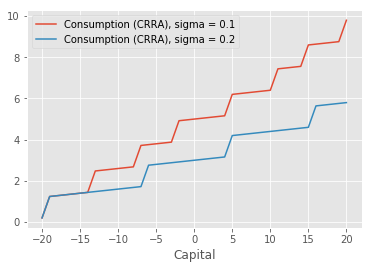

In [2]:
r = 0.04
II4_1_inf_CRRA = HW5_VFI(0.06, r, 0.1, 100, 0, 0, 1)
II4_1_inf_CRRA2 = HW5_VFI(0.06, r, 0.2, 100, 0, 0, 1)
V_TEST, a_dec_TEST = II4_1_inf_CRRA.main_VFI()
c_dec_cert_S, a_dec2_cert_S = II4_1_inf_CRRA.recover_C()
c_dec_cert_S2, a_dec2_cert_S2 = II4_1_inf_CRRA2.recover_C()

#consumption CRRA vs initial capital
def plot_II4_1_inf_CRRA():
    plt.plot(II4_1_inf_CRRA.A, c_dec_cert_S[1], label='Consumption (CRRA), sigma = 0.1')
    plt.plot(II4_1_inf_CRRA.A, c_dec_cert_S2[1], label='Consumption (CRRA), sigma = 0.2')
    #plt.plot(II4_1_inf_CRRA.A, c_dec_cert_S[0], label='Consumption (CRRA) as a function of capital')
    plt.legend()
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlabel('Capital')
plot_II4_1_inf_CRRA()

[QUADRATIC UTILITY]: Consumption 

##### [QUADRATIC UTILITY]: 

Consumption policy for quadratic utility function against the capital differes depending on the bliss point value: the higher the value of the bliss point (sufficiently large end-of-period wealth) the steeper and higher consumption growth.

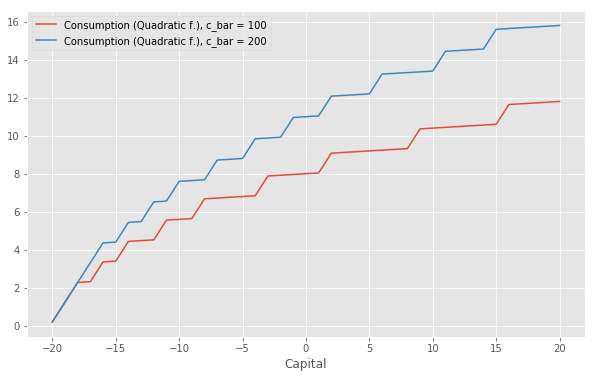

In [3]:
II4_1_inf_quad = HW5_VFI(0.06, r, 0, 100, 0, 0, 1)
II4_1_inf_quad2 = HW5_VFI(0.06, r, 0, 200, 0, 0, 1)
V_TEST_quad, a_dec_TEST_quad = II4_1_inf_quad.main_VFI()
c_dec_cert_S_quad, a_dec2_cert_S_quad = II4_1_inf_quad.recover_C()
c_dec_cert_S_quad2, a_dec2_cert_S_quad2 = II4_1_inf_quad2.recover_C()

#consumption Quadratic against initial capital
def plot_II4_1_inf_Quad():
    plt.plot(II4_1_inf_quad.A, c_dec_cert_S_quad[1], label='Consumption (Quadratic f.), c_bar = 100')
    plt.plot(II4_1_inf_quad.A, c_dec_cert_S_quad2[1], label='Consumption (Quadratic f.), c_bar = 200')
    plt.legend()
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlabel('Capital')
plot_II4_1_inf_Quad()

#### Uncertainty case for Quadratic utility function:

At the graph below violet line represents consumption policy for certainty case. Blue and red lines state for uncertaunly case. With introduction of negative/ positive shock precautionary savings of the agent increase in response to uncertainty regarding future income: while he saves more, consumption policy decreases compared to certainty case.

For positive shocks case the consumption policy line is slightly higher than negative shocks' line.

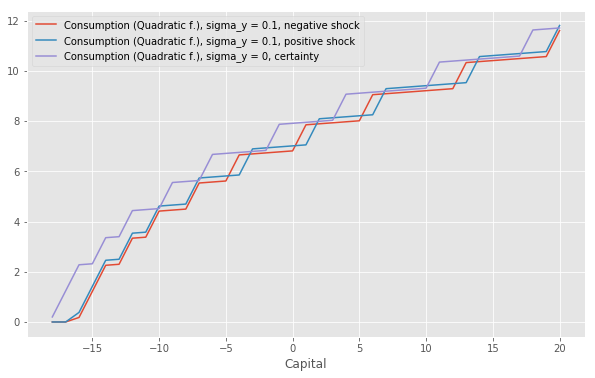

In [4]:
#II4.2
II4_2_inf_quad = HW5_VFI(0.06, r, 0, 100, 0, 0.1, 1)
V_TEST_quad_2, a_dec_TEST_quad_2 = II4_2_inf_quad.main_VFI()
c_dec_cert_S_quad_2, a_dec2_cert_S_quad_2 = II4_2_inf_quad.recover_C()

c_dec_cert_S_quad_2_norm = [0]*2
c_dec_cert_S_quad_2_norm[0] = np.concatenate(([0]*(len(II4_1_inf_quad.A)-len(II4_2_inf_quad.A)), c_dec_cert_S_quad_2[0]), axis=0)
c_dec_cert_S_quad_2_norm[1] = np.concatenate(([0]*(len(II4_1_inf_quad.A)-len(II4_2_inf_quad.A)), c_dec_cert_S_quad_2[1]), axis=0)

def plot_II4_2_inf_Quad():
    plt.plot(II4_2_inf_quad.A, c_dec_cert_S_quad_2_norm[0][0:(len(II4_2_inf_quad.A))], label='Consumption (Quadratic f.), sigma_y = 0.1, negative shock')
    plt.plot(II4_2_inf_quad.A, c_dec_cert_S_quad_2_norm[1][0:(len(II4_2_inf_quad.A))], label='Consumption (Quadratic f.), sigma_y = 0.1, positive shock')
    plt.plot(II4_2_inf_quad.A, c_dec_cert_S_quad[1][0:(len(II4_2_inf_quad.A))], label='Consumption (Quadratic f.), sigma_y = 0, certainty')
    plt.legend()
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlabel('Capital')
#plot certainty and uncertainty
plot_II4_2_inf_Quad()

Uncertainty case dynamics for assets supports the previous trends for consupmtion policy. With the presense of shocks, asset decision policy is higher in order to be able to do precautionary savings. 

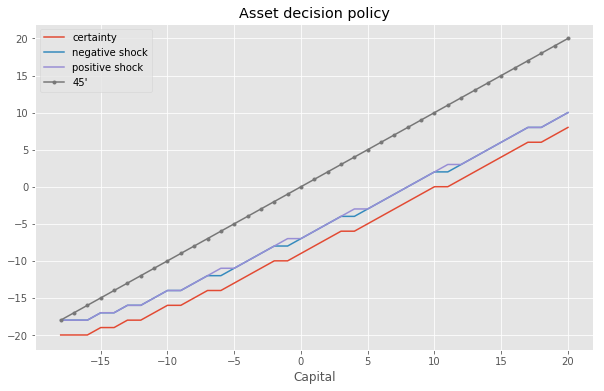

In [5]:
a_dec_cert_S_quad_2_norm = [0]*2
a_dec_cert_S_quad_2_norm[0] = np.concatenate(([0]*(len(II4_1_inf_quad.A)-len(II4_2_inf_quad.A)), a_dec2_cert_S_quad_2[0]), axis=0)
a_dec_cert_S_quad_2_norm[1] = np.concatenate(([0]*(len(II4_1_inf_quad.A)-len(II4_2_inf_quad.A)), a_dec2_cert_S_quad_2[1]), axis=0)

def plot_II_2_inf_quad_asset():   
    plt.plot(II4_2_inf_quad.A, a_dec2_cert_S_quad[0][0:(len(II4_2_inf_quad.A))], label='certainty')
    plt.plot(II4_2_inf_quad.A, a_dec2_cert_S_quad_2[0][0:(len(II4_2_inf_quad.A))], label='negative shock')
    plt.plot(II4_2_inf_quad.A, a_dec2_cert_S_quad_2[1][0:(len(II4_2_inf_quad.A))], label='positive shock')
    plt.plot(II4_2_inf_quad.A, II4_2_inf_quad.A, label='45\'', marker='.')
    plt.legend()
    plt.legend()
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlabel('Capital')
    plt.title('Asset decision policy')

plot_II_2_inf_quad_asset()

## FINITE CASE
### PARTIAL EQUILIBRIUM

To solve partial equilibrium model for finite time (T=45), we used the Euler equation method.

In [6]:
class HW5:
    
    def __init__(self, rho, r, sigma, c_bar, gamma, sigma_y, T):
        self.rho = rho
        self.r = r
        self.sigma = sigma
        self.c_bar = c_bar
        self.gamma = gamma
        self.sigma_y = sigma_y
        self.beta = 1/(1+rho)
        self.Y1 = [1-sigma_y, 1+sigma_y]
        self.PI1 = [[(1+gamma)/2, (1-gamma)/2], [(1-gamma)/2, (1+gamma)/2]]
        if T==0:
            self.A_min = -min(self.Y1)*((1+r)/r)
        else:
            self.A_min = -min(self.Y1)*((1+r-(r+1)**(-T))/r)
        print(min(self.Y1))
        self.A = np.linspace(0.1, 20, 100)
        self.T = T
            
    def u(self, c):
        if c<0:
            return(-1111111111)
        else:
            if self.sigma != 0:
                return ((c**(1-self.sigma)-1)/(1-self.sigma)) #CRRA
            else:
                return (-0.5*(c-self.c_bar)**2) #quad
        
    def d_u(self, c):
        if c<0:
            return(-33333333111111111111)
        else:   
            if self.sigma != 0:
                return (c**(-self.sigma))
            else:
                return (-c)
    
    def Euler(self, ai, aj, a_prev, y):
        for i in range(len(self.PI1)):
            if y == self.Y1[i]:
                row = i
        suma = 0
        for i in range(len(self.PI1)):
            suma = self.PI1[row][i]*self.d_u(self.Y1[i]+(1+self.r)*aj-a_prev) 
        x = self.d_u(y+(1+self.r)*ai-aj) - self.beta * (1 + self.r) * suma
        return (x)
    
    def solve_Euler(self, ai, aj, y):
        aj_opt = list(fsolve(lambda a_prev: self.Euler(ai, aj, a_prev, y), aj))
        return(aj_opt[0])
    
    def transition(self, aj, ai, y, T):
        aT = 0 # asset in the last period
        A = []
        for i in range(T+1):
            if i == 0:
                a = self.d_u(y + (1+self.r)*ai-aj[i]) - self.beta*(1+self.r)*y*self.d_u(y+(1+self.r)*aj[i]-aj[i+1])        
            elif i == T:
                a = self.d_u(y + (1+self.r)*aj[i-1]-aj[i]) - self.beta*(1+self.r)*y*self.d_u(y+(1+self.r)*aj[i]-aT)           
            else:
                a = self.d_u(y + (1+self.r)*aj[i-1]-aj[i]) - self.beta*(1+self.r)*y*self.d_u(y+(1+self.r)*aj[i]-aj[i+1])        
            A.append(a)
        return(A)
              
    def assets_path(self, ai, y, aT):
        T = self.T
        if self.T > 0:
            #aT = 0 # asset in the last period            
            aj0 = np.linspace(ai, aT, T+1) #first guess - linear
            assets_path = fsolve(lambda aj: self.transition(aj, ai, y, T), aj0)
            return(assets_path)    
        else:
            aj = []
            aj.append(ai) # init guesses of a'0
            aj.append(self.solve_Euler(ai, aj[-1], y))            
            while abs(aj[-1]-aj[-2])>0.05:
                aj.append(self.solve_Euler(aj[-2], aj[-1], y))
            aT_SS = aj[-1]
            aj0 = np.linspace(ai, aT_SS, 30+1) #first guess - linear
            assets_path = fsolve(lambda aj: self.transition(aj, ai, y, 30), aj0)
            return(assets_path)              
        
    def consum_path(self, assets_path, y):
        Consum_path = []
        for i in range(len(assets_path)-1):
            Consum_path.append(y+(1+self.r)*assets_path[i]-assets_path[i+1])
        return(Consum_path)
#II4.1    

#### ASSETS AND CONSUMPTION PATHS
##### [CRRA UTILITY]:
In the graph below we represent aasents and consumption paths in finite period case. While consumption path has slightly decreasing trend but remains almost at the same level, assets from initial value of 2 drops to 0, since we know that at the last period assets have to be equal to 0 in finite time.

1


C:\Users\adamw\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


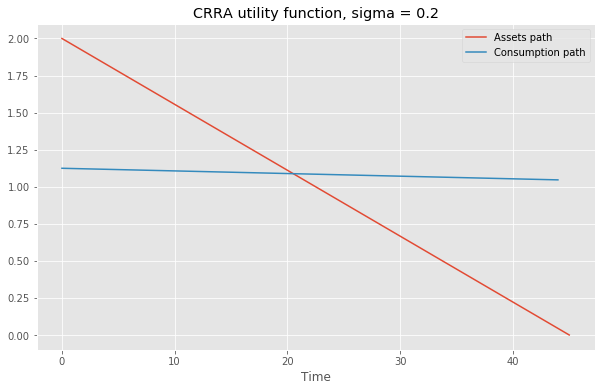

In [7]:
#assets and consumption paths CRRA
II4_1_finite = HW5(0.06, 0.04, 0.5, 100, 0, 0, 45)
ass_path_1 = II4_1_finite.assets_path(2, 1, 0)
Consum_path_in_II4_1_finite = II4_1_finite.consum_path(ass_path_1,1)
def plot_2_4_1_2_CRRA():
    plt.plot(range(len(ass_path_1)), ass_path_1, label='Assets path')
    plt.plot(range(len(Consum_path_in_II4_1_finite)),Consum_path_in_II4_1_finite, label='Consumption path')
    plt.title('CRRA utility function, sigma = 0.2')
    plt.legend()
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlabel('Time')
    
plot_2_4_1_2_CRRA()

##### [QUADRATIC UTILTY]:

For quadratic utility case consumption path follow a slightly increasing dynamics, and assets has a concave shape, reaching 0 at the last period. 

1


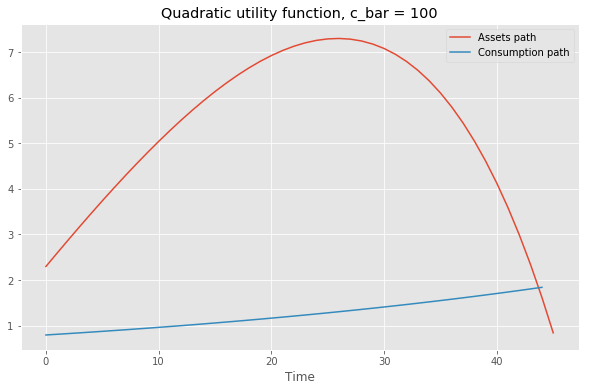

In [8]:
#assets and consumption paths Quadratic
II4_1_finite_quad = HW5(0.06, 0.04, 0, 100, 0, 0, 45)
ass_path_1_quad = II4_1_finite_quad.assets_path(2, 1, 0)
Consum_path_in_II4_1_finite_quad = II4_1_finite.consum_path(ass_path_1_quad,1)
def plot_2_4_1_2_quad():
    plt.plot(range(len(ass_path_1_quad)), ass_path_1_quad, label='Assets path')
    plt.plot(range(len(Consum_path_in_II4_1_finite_quad)),Consum_path_in_II4_1_finite_quad, label='Consumption path')
    plt.title('Quadratic utility function, c_bar = 100')
    plt.legend()
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlabel('Time')
plot_2_4_1_2_quad()

#### Consumption functions against initial capital

##### [CRRA]:
Plotting consumption paths for different levels of initial capital, with the highest line represeting consumption path for the initial capital equal to 20, and the lowest line - for capital equal t0 0.1. Vector of initial levels of capital is represented below.

In [9]:
II4_1_finite.A # levels of capital

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

C:\Users\adamw\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


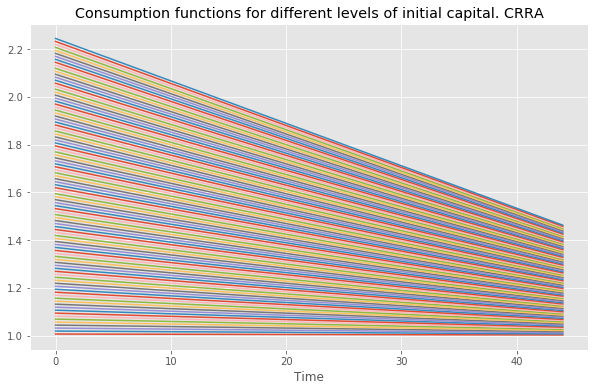

In [10]:
#consumption functions against initial capital, CRRA
c_5 = [0]*len(II4_1_finite.A)
c_40 = [0]*len(II4_1_finite.A)
for a in range(len(II4_1_finite.A)):
    ass_path_temp = II4_1_finite.assets_path(II4_1_finite.A[a], 1, 0)
    cons_path_temp = II4_1_finite.consum_path(ass_path_temp,1)
    plt.plot(range(45), cons_path_temp)
    c_5[a] = cons_path_temp[6]
    c_40[a] = cons_path_temp[41]
    plt.title('Consumption functions for different levels of initial capital. CRRA')
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlabel('Time')

Graph below shows consumption functions for two picked ages, $c_{5}(a, y)$ and $c_{40}(a, y)$. Depending on the level of initial capital at age of 5 the agent has higher consumption than at age of 40. Since the consumption function at the capital level close to zero is almost flat, once we are plotting separetely consumption functions for age 5 and 40, we can see that for small levels of capital the lines for age 5 and 40 have almost same value around 1.

Text(0.5,0,'Capital')

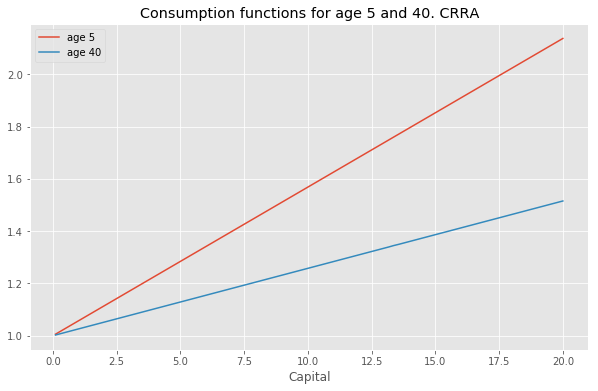

In [11]:
plt.plot(II4_1_finite.A, c_5, label='age 5')
plt.plot(II4_1_finite.A, c_40, label='age 40')
plt.title('Consumption functions for age 5 and 40. CRRA')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Capital')
#plt.xlim([0.1,20])

##### [QUADRATIC]:

For quadratic utility function consumption paths for different levels of initial capital, with the highest line represeting consumption path for the initial capital equal to 20, and the lowest line - for capital equal to 0.1, have convex shape.

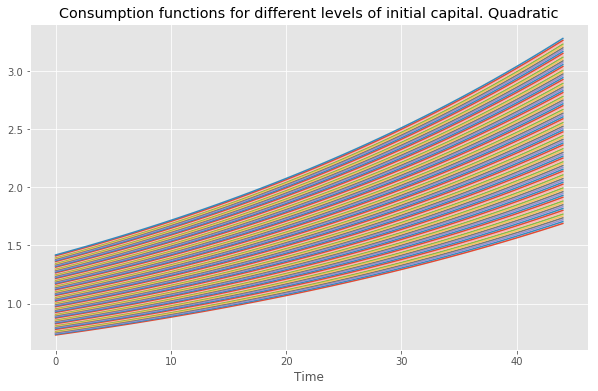

In [12]:
#consumption functions against initial capital, Quad
c_5_quad = [0]*len(II4_1_finite_quad.A)
c_40_quad = [0]*len(II4_1_finite_quad.A)
for a in range(len(II4_1_finite_quad.A)):
    ass_path_temp = II4_1_finite_quad.assets_path(II4_1_finite_quad.A[a], 1, 0)   
    cons_path_temp = II4_1_finite_quad.consum_path(ass_path_temp,1)
    plt.plot(range(45), cons_path_temp)
    c_5_quad[a] = cons_path_temp[6]
    c_40_quad[a] = cons_path_temp[41]
    plt.title('Consumption functions for different levels of initial capital. Quadratic')
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlabel('Time')

Opposite to the previous case, with CRRA utility, in the case of quadratic utility at the age of 40 consumption function is higher than at age 5, with also slighlty steeper slope. 

Text(0.5,0,'Capital')

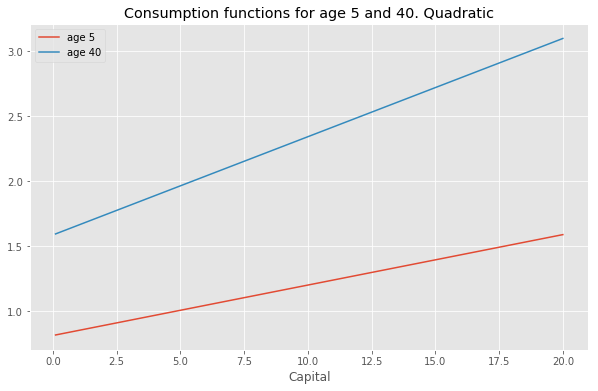

In [13]:
plt.plot(II4_1_finite_quad.A, c_5_quad, label='age 5')
plt.plot(II4_1_finite_quad.A, c_40_quad, label='age 40')
plt.title('Consumption functions for age 5 and 40. Quadratic')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Capital')

## [II] GENERAL EQUILIBRIUM

For the general equlinrium case we assumed Cobb-Douglas production function, fixing labor at 1, and labor share ($\alpha$) is 0.67, and we used VFI method to calculate GE.

In [14]:
class HW5_VFI_GE:
    
    def __init__(self, rho, r, sigma, c_bar, gamma, sigma_y, y):
        self.rho = rho
        self.r = r
        self.sigma = sigma
        self.c_bar = c_bar
        self.gamma = gamma
        self.sigma_y = sigma_y
        self.beta = 1/(1+rho)
        self.Y1 = [y-sigma_y, y+sigma_y]
        self.PI1 = [[(1+gamma)/2, (1-gamma)/2], [(1-gamma)/2, (1+gamma)/2]]
        self.A_min = round(-min(self.Y1)*((1+r)/r)/1.3) #divide by 1.3 temporarily
        #self.A = np.linspace(self.A_min, 100, 100)       
        self.p = int(abs(self.A_min)+20+1)
        self.A = np.linspace(self.A_min, 20, self.p)
            
    def u(self, c):
        if c<0:
            return(-1111111111)
        else:
            if self.sigma > 0:
                return ((c**(1-self.sigma)-1)/(1-self.sigma)) #CRRA
            else:
                return (-0.5*(c-self.c_bar)**2) #quad
        

    def d_u(self, c):
        if c<0:
            return(-33333333)
        else:   
            if self.sigma > 0:
                return (c**(-self.sigma))
            else:
                return (-(c-self.c_bar))
    
    #Coob Douglas prod. function. Labor fixed as 1. Alpha = 0.67        
    def F(K):
        return(K**(1-0.67)*1**(0.67))
        
    #derivative of F wrt capital.
    #function of "r" wrt "L"
    #demand for capital
    def d_F_K(K):
        return((1-0.67)*K**(-0.67))
    
    #derivative of F wrt Labor.
    def d_F_L(K):
        return((0.67)*K**(1-0.67)*1*(0.67-1))
     
    
    def m(self, ai,aj, y):
        if aj<self.A_min:
            return -9999999999999999999
        else:
            c = y-aj+ai*(1+self.r)
            #Step 4 (consumption must be non negative)
            if c >= 0:
                return self.u(c)
            else:
                return (-10000000000000000000)

    def matrix_M(self):
        M = [0]*(self.p*len(self.Y1))
        for i in range(self.p*len(self.Y1)):
            M[i] = [0] * self.p
        for prod in range(len(self.Y1)):
            for i in range(self.p):
                for j in range(self.p):
                    index = i+self.p*prod
                    M[index][j] = self.m(self.A[i], self.A[j], self.Y1[prod])
        return(M)            

    def matrix_W(self, V):
        #Step 5.0: Compute the matrix Wsq×p,
        W = [0]*len(self.Y1)
        for i in range(len(self.Y1)):
            W[i] = [0] * self.p
    
        for j in range(self.p):
            for i in range(len(self.Y1)):
                W[i][j] = 0
                for x in range(len(self.Y1)):
                    W[i][j] = W[i][j] + self.PI1[i][x]*V[-1][j] #to do 
        
        return(W)
    
    def CHI(self, M, W):
        Chi = [0]*(self.p*len(self.Y1))  
        for i in range(self.p*len(self.Y1)):
            Chi[i] = [0] * self.p
                
        for j in range(self.p):
            for i in range(self.p*len(self.Y1)):
                Chi[i][j] = 0
                for x in range(len(self.Y1)):
                    Chi[i][j] = M[i][j] + self.beta*W[x][j]   
                
        return(Chi)    
    
    def consum_path(self, assets_path, y):
        Consum_path = []
        for i in range(len(assets_path)-1):
            Consum_path.append(y+(1+self.r)*assets_path[i]-assets_path[i+1])
        return(Consum_path)

    def update_V(self, V, Chi, a_dec):
        V_new = [0]*(self.p*len(self.Y1))
        a_dec_new = [0]*(self.p*len(self.Y1))
        for i in range(self.p*len(self.Y1)):
            V_new[i]=max(Chi[i])
            a_dec_new[i] = np.argmax(Chi[i])
            
        V.append(V_new)
        a_dec.append(a_dec_new)
    
        return(V, a_dec)
        
    def main_VFI(self):
        #Step 4
        V = []
        a_dec = []
        V.append(list(np.zeros(int(self.p*len(self.Y1))))) #Guess a solution
        V.append(list(np.zeros(int(self.p*len(self.Y1)))))
        a_dec.append(list(np.zeros(self.p*len(self.Y1))))
        a_dec.append(list(np.zeros(self.p*len(self.Y1))))
    
        M = self.matrix_M()
        W = self.matrix_W(V) #Step 5.0
        Chi = self.CHI(M, W) #Step 5.1
        V, a_dec = self.update_V(V, Chi, a_dec) #STEP 5.2
           
        while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 1): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
            W = self.matrix_W(V) #Step 5.0
            Chi = self.CHI(M, W) #Step 5.1
            V, a_dec = self.update_V(V, Chi, a_dec) #STEP 5.2
            
        return(V, a_dec)
    
    def recover_C(self):
        V, a_dec = self.main_VFI()
        c_dec = [0]*len(self.Y1)
        a_dec_temp = [0]*len(self.Y1)
        for i in range(len(self.Y1)):
            c_dec[i]=[0]*len(self.A)
            a_dec_temp[i]=[0]*len(self.A)
            
        for y in range(len(self.Y1)):
            for a in range(len(self.A)):
                idx=int(a+y*len(self.A))
                c_dec[y][a] = self.Y1[y] + (1+self.r)*self.A[a] - self.A[a_dec[-1][idx]]
                a_dec_temp[y][a] = self.A[a_dec[-1][idx]] #transform a_dec variable:
        
        return(c_dec, a_dec_temp)
    
    def ass_SS(self):
        assets_path = self.recover_C()[1]
        for i in range(len(assets_path[0])):
            if assets_path[0][i] == self.A[i]:
                Ass_SS = assets_path[0][i]
        return(Ass_SS)

We assume that there is a reprsentative agent and respentative firm. Supply of the capital is given by the level of assets of the agent in the steady-state. Interest rate function has concave shape. Suuply of capital is increasing with the interest rate.

No handles with labels found to put in legend.


Text(0,0.5,'Interest rate')

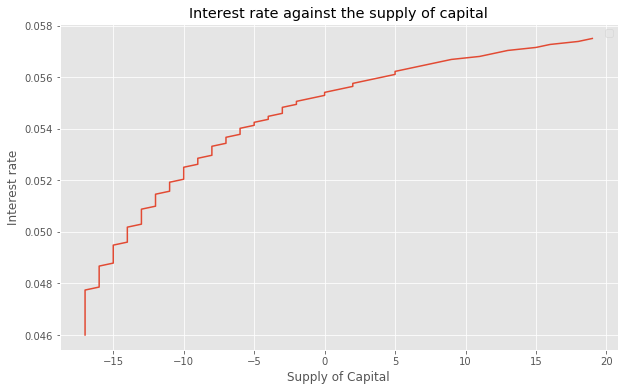

In [15]:
#ass SS
TEST = HW5_VFI_GE(0.06, 0.0555, 0.2, 100, 0, 0, 1)
TEST.ass_SS()
#plot supply of capital
r_space = np.linspace(0.046, 0.0575, 100)
supply = [0]*len(r_space)
for i in range(len(r_space)):
    TEMP = HW5_VFI_GE(0.06, r_space[i], 0.2, 100, 0, 0, 1)
    supply[i] = TEMP.ass_SS()
plt.plot(supply, r_space)
plt.title('Interest rate against the supply of capital')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Supply of Capital')
plt.ylabel('Interest rate')

With increase of interest rate the demand of capital is decreasing.

C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Interest rate')

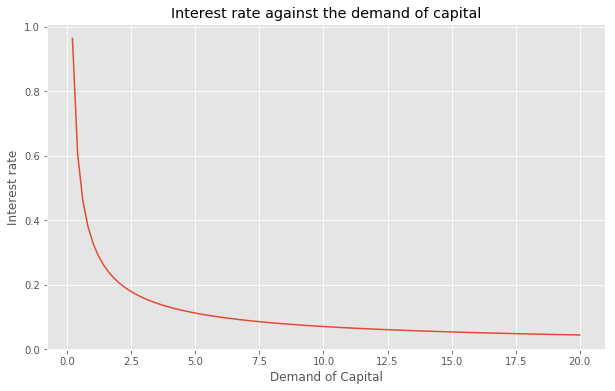

In [16]:
#plot demand of capital
K = np.linspace(0, 20, 100)
plt.plot(K, (1-0.67)*K**(-0.67))
plt.title('Interest rate against the demand of capital')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Demand of Capital')
plt.ylabel('Interest rate')

###### Calculating the GE we draw aggregate supply and demand curves, and the intersection gives equilibrium interest rates and capital.

C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


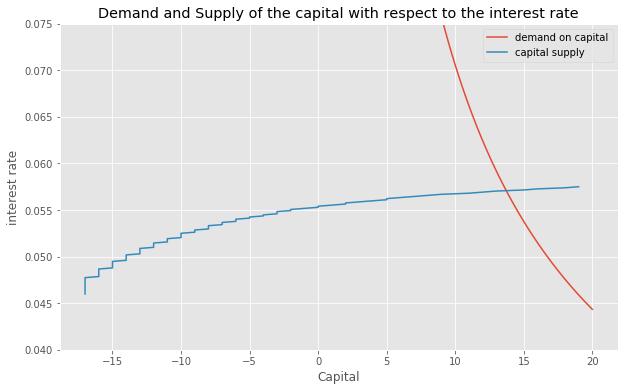

In [17]:
#plot demand and supply
def plot_demand_supply():
    plt.plot(K, (1-0.67)*K**(-0.67), label='demand on capital')
    plt.plot(supply, r_space, label = 'capital supply')
    plt.ylim([0.04,0.075])
    plt.legend()
    plt.ylabel('interest rate')
    plt.xlabel('Capital')   
    plt.title('Demand and Supply of the capital with respect to the interest rate')
plot_demand_supply()

C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


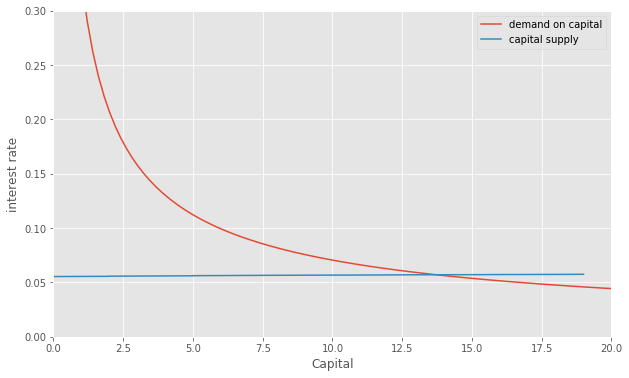

In [18]:
#plot demand and supply (different scale)
def plot_demand_supply2():
    plt.plot(K, (1-0.67)*K**(-0.67), label='demand on capital')
    plt.plot(supply, r_space, label = 'capital supply')
    plt.xlim([0,20])
    plt.ylim([0,0.3])
    plt.legend()
    plt.ylabel('interest rate')
    plt.xlabel('Capital')
plot_demand_supply2()